In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Changed for security")
project = rf.workspace("binpickingrobot").project("benddetection")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
!nvidia-smi


Wed Apr 23 18:50:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [8]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 103MB/s] 
New https://pypi.org/project/ultralytics/8.3.115 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/benddetection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/benddetection-1/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.91it/s]
                   all         12         47      0.997          1      0.995      0.784
Speed: 0.4ms preprocess, 17.3ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


/content


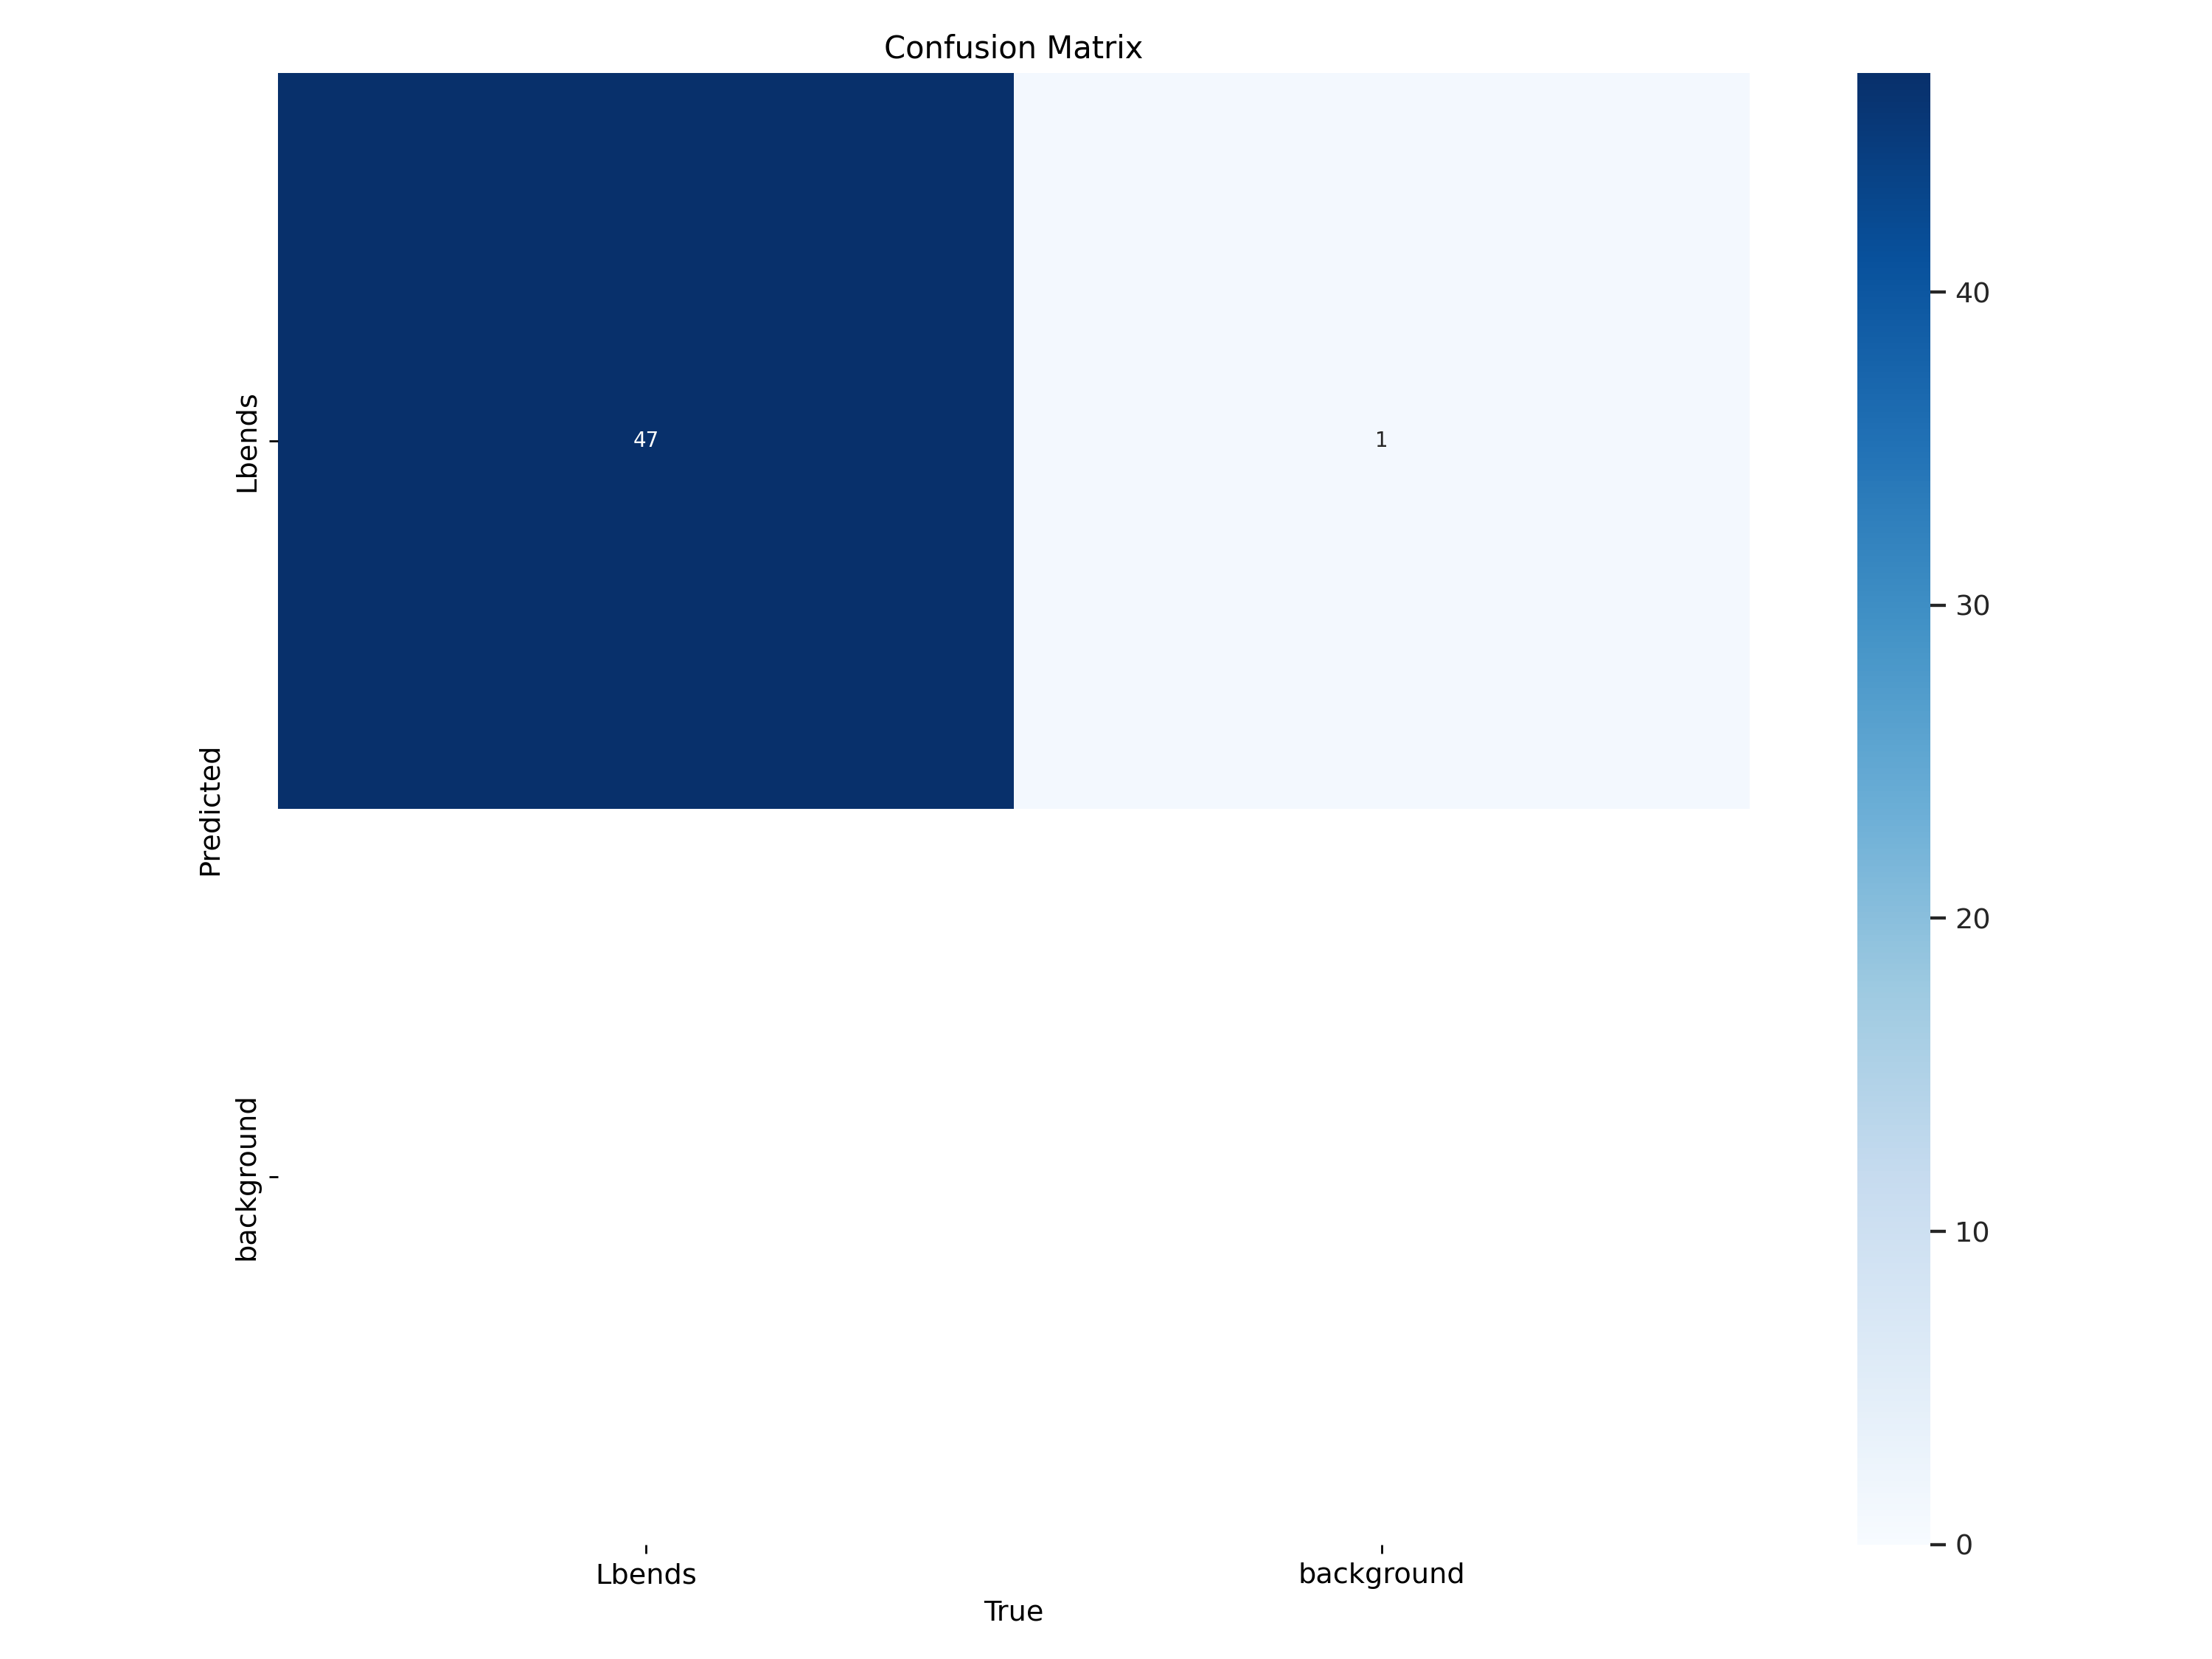

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


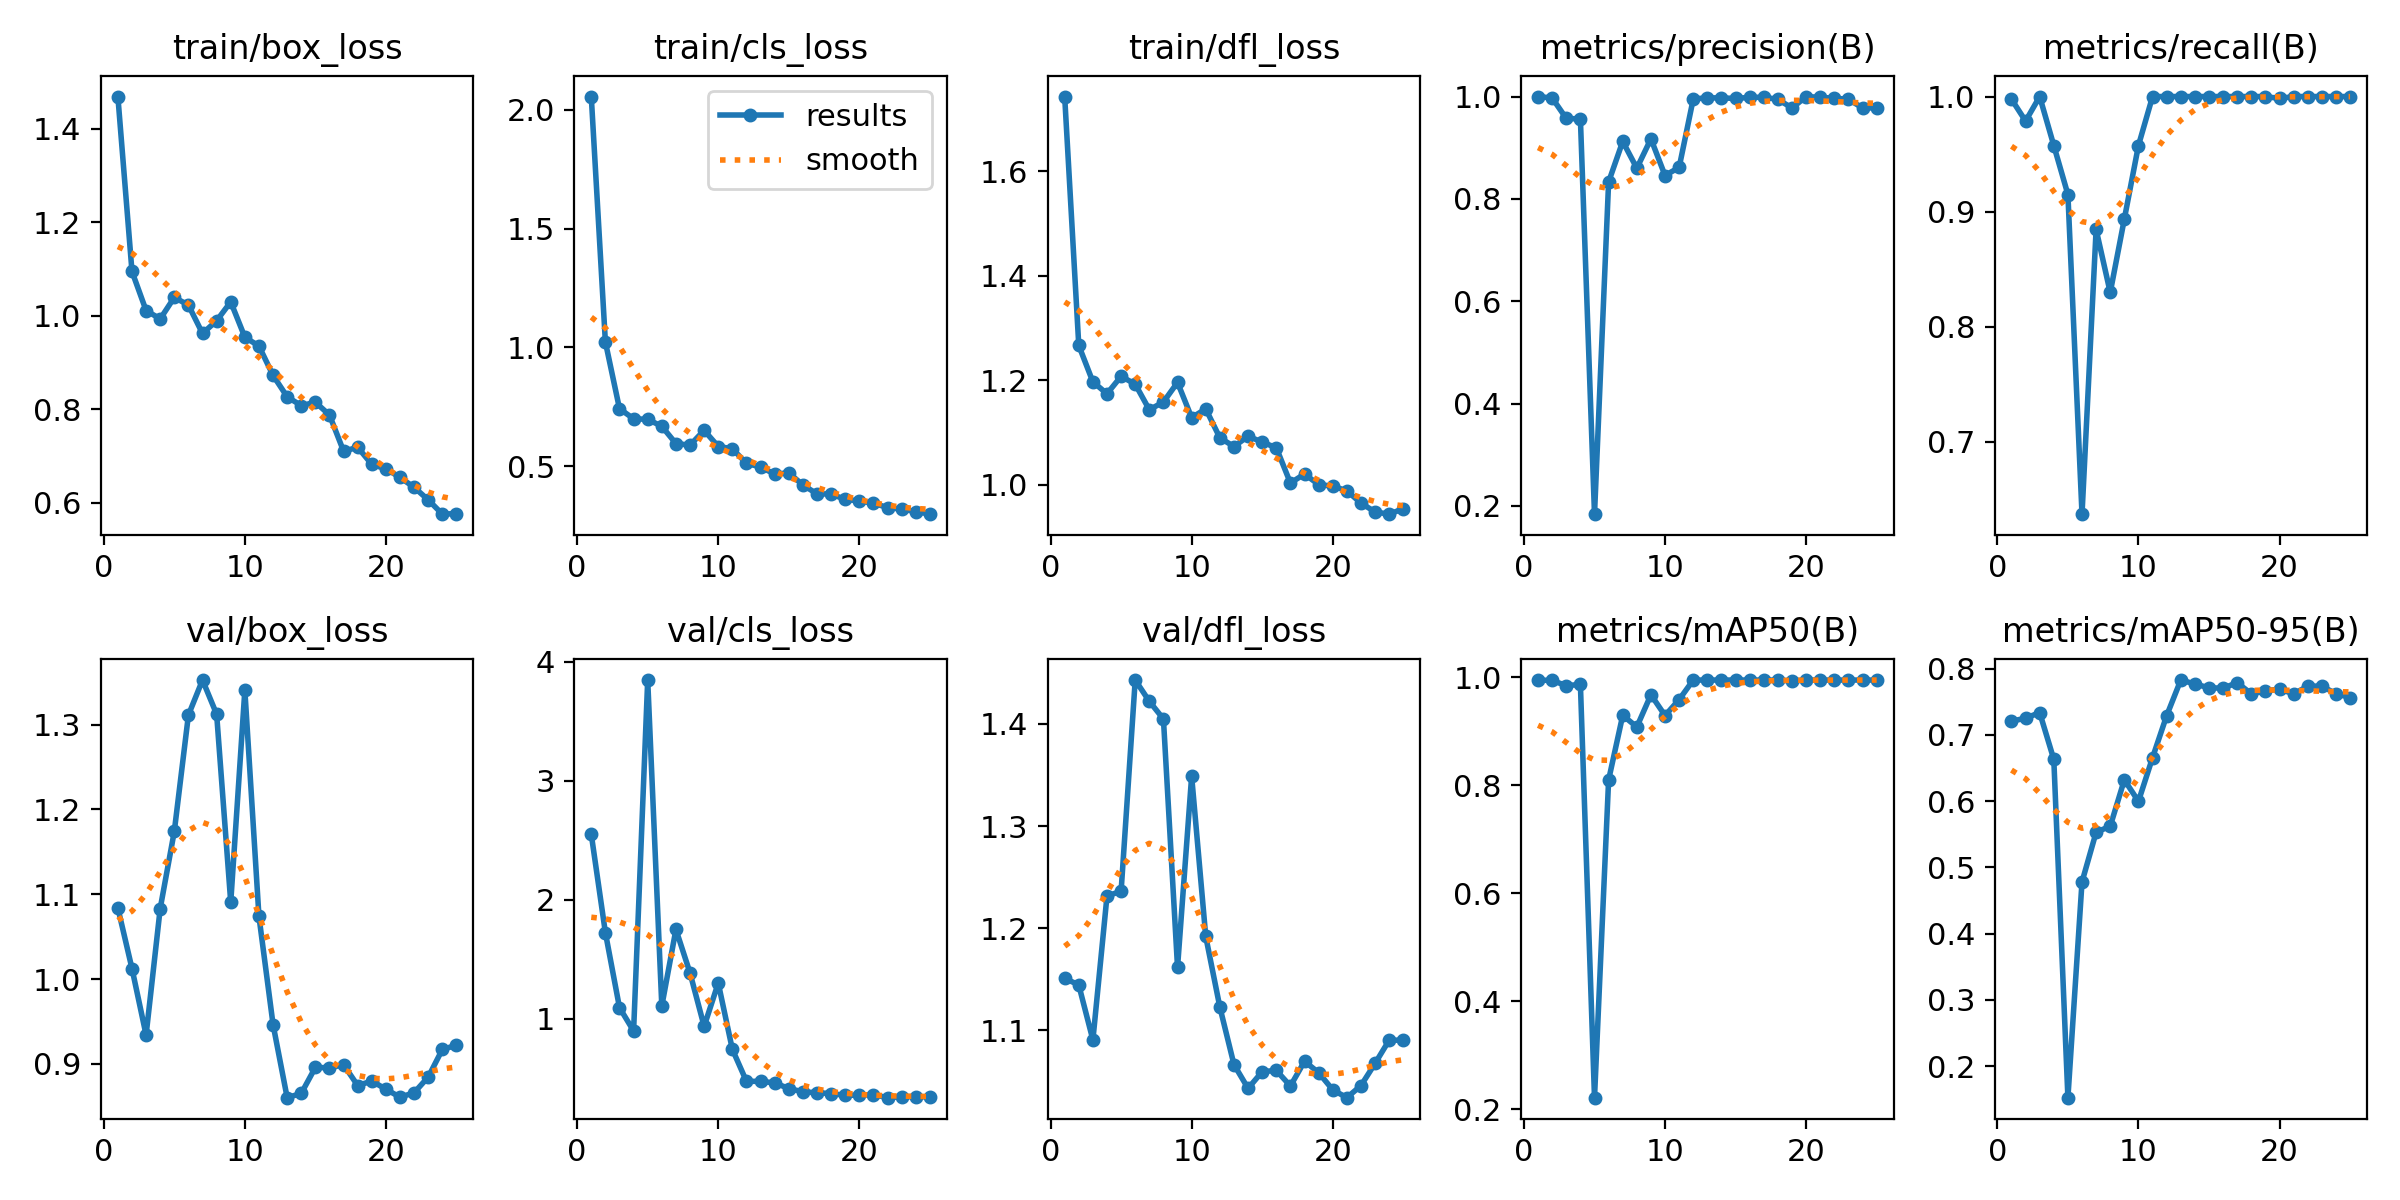

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


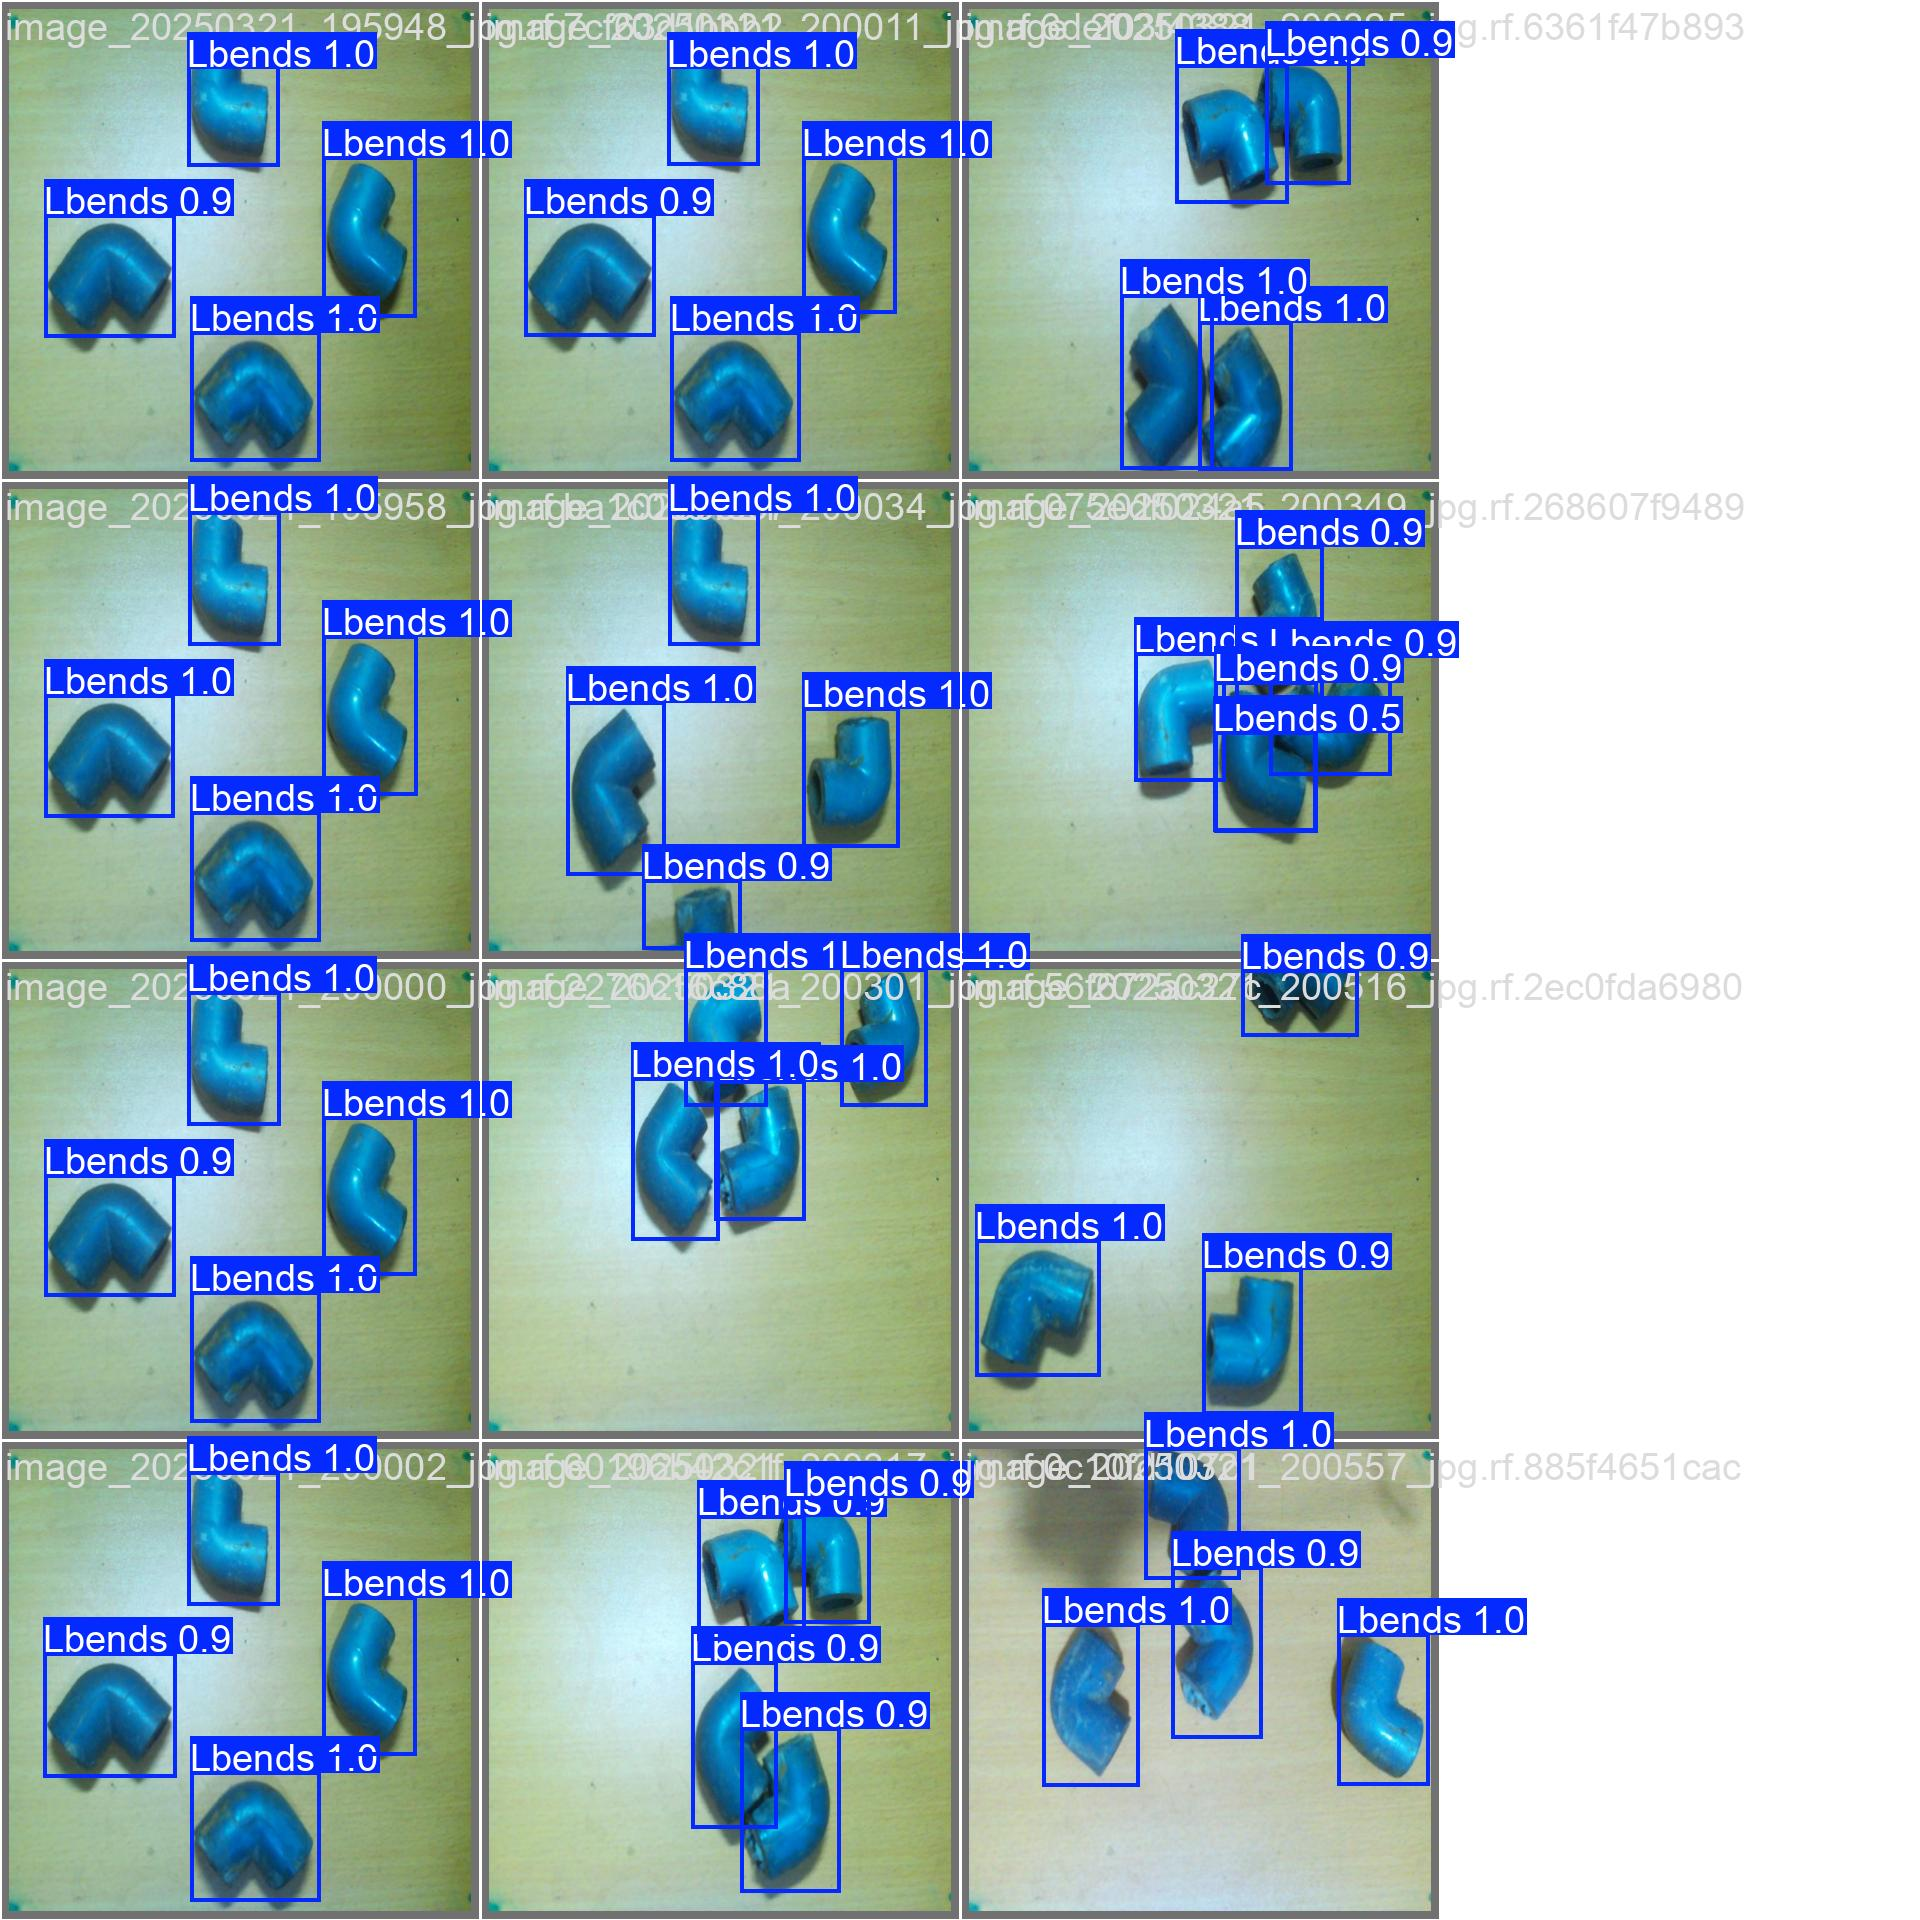

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [16]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on image_20250321_200019_jpg.rf.1104181b3aa997a129314cd88132c7f6.jpg


{'predictions': [{'x': 350,
   'y': 542,
   'width': 138,
   'height': 195,
   'confidence': 0.9311668872833252,
   'class': 'Lbends',
   'class_id': 0,
   'detection_id': '4cab6ce9-8a19-4a14-ba66-07ee4125ee56',
   'image_path': '/content/benddetection-1/test/images/image_20250321_200019_jpg.rf.1104181b3aa997a129314cd88132c7f6.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 141,
   'y': 372,
   'width': 184,
   'height': 173,
   'confidence': 0.9222224950790405,
   'class': 'Lbends',
   'class_id': 0,
   'detection_id': '3d32d0e1-dab3-47da-80bb-fce483bee757',
   'image_path': '/content/benddetection-1/test/images/image_20250321_200019_jpg.rf.1104181b3aa997a129314cd88132c7f6.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 498,
   'y': 311,
   'width': 131,
   'height': 210,
   'confidence': 0.9212194681167603,
   'class': 'Lbends',
   'class_id': 0,
   'detection_id': 'c24274a0-ba45-49b7-8030-e708a8ceaf72',
   'image_path': '/content/benddetection-1/test/images

Saving image_20250321_201111.jpg to image_20250321_201111.jpg


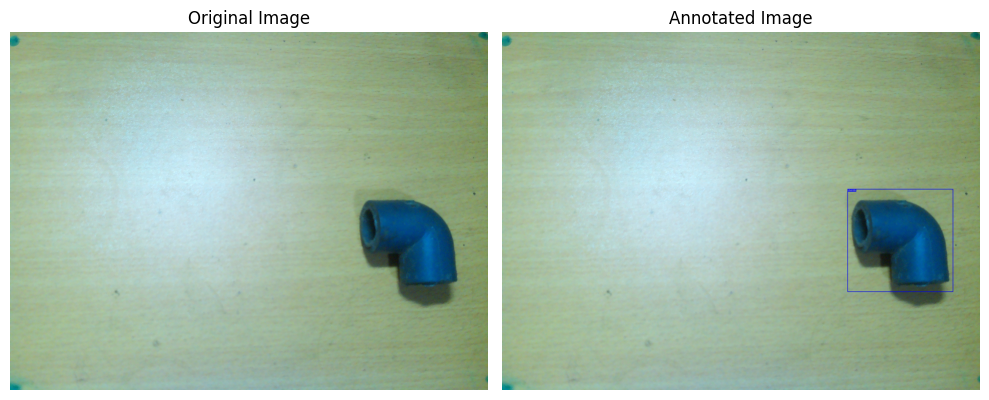

In [19]:
from google.colab import files
from PIL import Image
import IPython.display as display
import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the image
image = Image.open(io.BytesIO(uploaded[filename]))

# Assuming you already have a `model` loaded from Roboflow or similar
# And test_set_loc is the directory where your test images are

test_image_path = filename  # Use the uploaded filename

# Predict with your model
# Adjust the method based on your model API
pred = model.predict(test_image_path, confidence=40, overlap=30).json()

# Get annotated frame (if supported)
# For Roboflow model, you can get the annotated image like this:
pred_image = model.predict(test_image_path, confidence=40, overlap=30).save("pred.jpg")

# Show the annotated image
annotated = Image.open("pred.jpg")


plt.figure(figsize=(10, 5))

# First image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Second image
plt.subplot(1, 2, 2)
plt.imshow(annotated)
plt.title("Annotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()



In [18]:
print(model)

{
  "id": "benddetection/1",
  "name": "benddetection",
  "version": "1",
  "classes": null,
  "overlap": 30,
  "confidence": 40,
  "stroke": 1,
  "labels": false,
  "format": "json",
  "base_url": "https://detect.roboflow.com/"
}
